# To Run this code You will have to install alot of libraries Some have specific installation command if you are using Juypter through Anaconda
pip install selenium
pip install yfinance
pip install empyrial
pip intsall pandas data_reader
pip install pyfolio
pip install alphalens
pip install quantstats 

pip install jpype
pip install asposecells

In [13]:
import pandas as pd
import yfinance as yf
import numpy as np
from datetime import datetime
import matplotlib as plt
%matplotlib inline

# silence warnings
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
#emyrial engine 
import empyrial
from empyrial import empyrial, Engine

#alphalens
import alphalens
#pyfolio
import pyfolio as pf

In [14]:
''' This is the Current Allocation. Fill with curent funds and weights.'''
#Note: if the weights dont add to 1 for both current and new then the comparison wont be accurate
current_portfolio = {
    'Equitys': {
        'Small cap': {
            'DHLRX': 0.0957,
            'BVALX': 0.0784,
            'NMVLX': 0.0729,
            'HILIX': 0.07,
            'VGHCX': 0.06,
            'APDKX': 0.0593,
            'LBFIX': 0.0564,
            'JFGIX': 0.0444,
            'MGGIX': 0.0444
        },
        'mid cap': {
            'FTHSX': 0.0382,
            'GQGIX': 0.0377,
            'APDJX': 0.0284,
            'AVUV': 0.035,
            'VWNDX': 0.035,
            'GOGIX': 0.0274
        }
    },
    'Fixed Income': {
        'high short': {
              'BND': 0.01  
        },
        'high interm': {
          'BNDX': 0.0085  
        }
    },
    
    'Alternative': {
        #'real_estate': {
            #'BIMBX': 0.0598,
            #'BILPX': 0.0547
        
        'hedge': {
            'MBXIX': 0.0307
             
        },
        'Long-Short Equity':{
                'BPLSX': 0.0304
        }
       
    }
} 
###########################################   CAN BE CHANGED  #############################################
start= '2021-01-01'
end = '2023-05-31'
###########################################   CAN BE CHANGED  #############################################


current_equitys = {}  # Create an empty dictionary to store ticker symbols and their weights for Equitys
current_fixed_income = {}  # Create an empty dictionary to store ticker symbols and their weights for Fixed Income
current_alternative = {}  # Create an empty dictionary to store ticker symbols and their weights for Alternative

# Extracting ticker symbols and weights for 'Equitys'
equitys = current_portfolio['Equitys']
for equity_style, assets in equitys.items():
    for ticker, weight in assets.items():
        current_equitys[ticker] = weight

# Extracting ticker symbols and weights for 'Fixed Income'
fixed_income = current_portfolio['Fixed Income']
for fixed_income_style, assets in fixed_income.items():
    for ticker, weight in assets.items():
        current_fixed_income[ticker] = weight

# Extracting ticker symbols and weights for 'Alternative'
alternative = current_portfolio['Alternative']
for alternative_style, assets in alternative.items():
    for ticker, weight in assets.items():
        current_alternative[ticker] = weight

# Now, the variables 'current_symbols_equitys', 'current_symbols_fixed_income', and 'current_symbols_alternative'
# contain dictionaries with ticker symbols as keys and their corresponding weights as values.
#print("Equitys:", current_symbols_equitys)
#print("Fixed Income:", current_symbols_fixed_income)
#print("Alternative:", current_symbols_alternative)



#####################################################For Symbols###################################################################
current_symbols_equitys = [ticker for assets in current_portfolio['Equitys'].values() for ticker in assets.keys()]
current_symbols_fixed_income = [ticker for assets in current_portfolio['Fixed Income'].values() for ticker in assets.keys()]
current_symbols_alternative = [ticker for assets in current_portfolio['Alternative'].values() for ticker in assets.keys()]

# Merging the lists to get all the unique ticker symbols in order of insertion
current_symbols = current_symbols_equitys + current_symbols_fixed_income + current_symbols_alternative

# Now, the variable 'current_symbols' contains all the unique ticker symbols from all asset classes in order of insertion.
print(current_symbols)
######################################For Weights##########################################################################
current_weights_equitys = [ticker for assets in current_portfolio['Equitys'].values() for ticker in assets.values()]
current_weights_fixed_income = [ticker for assets in current_portfolio['Fixed Income'].values() for ticker in assets.values()]
current_weights_alternative = [ticker for assets in current_portfolio['Alternative'].values() for ticker in assets.values()]

# Merging the lists to get all the unique ticker weights in order of insertion
current_weights = current_weights_equitys + current_weights_fixed_income + current_weights_alternative
########################################################################################################
print(current_weights)
current_data = yf.download(current_symbols, start= start, end = end)
current_returns = current_data['Adj Close'].dropna()  # adjusted closing prices and removing missing values
current_returns = pd.DataFrame(current_returns) #converts current returns to dataframe

current_allocation = {} #an empty dictionary which will store the current allocation percentages for each fund.
for asset_class, funds in current_portfolio.items():
    for fund, allocation in funds.items():
        current_allocation[fund] = allocation #This code essentially copies the allocations from the current_portfolio dictionary to the current_allocation dictionary.
#df = current_returns

''''Downloads S&P500 datafrom yf Frequency: daily'''
sp500 = ['%5EGSPC']
spdata = yf.download(sp500, start= start, end= end)
sp500returns = spdata['Adj Close'].pct_change().dropna()


# how to pull specific dicts within dic
#print(current_portfolio['Equitys']['Small cap'].keys())

['DHLRX', 'BVALX', 'NMVLX', 'HILIX', 'VGHCX', 'APDKX', 'LBFIX', 'JFGIX', 'MGGIX', 'FTHSX', 'GQGIX', 'APDJX', 'AVUV', 'VWNDX', 'GOGIX', 'BND', 'BNDX', 'MBXIX', 'BPLSX']
[0.0957, 0.0784, 0.0729, 0.07, 0.06, 0.0593, 0.0564, 0.0444, 0.0444, 0.0382, 0.0377, 0.0284, 0.035, 0.035, 0.0274, 0.01, 0.0085, 0.0307, 0.0304]
[*********************100%***********************]  19 of 19 completed
[*********************100%***********************]  1 of 1 completed


# Current Portfolio with weights

Start date: 2021-01-01
End date: 2023-05-31


Backtest
                             
Annual return           3.58%
Cumulative return        8.8%
Annual volatility     13.55 %
Winning day ratio      51.82%
Sharpe ratio             0.33
Calmar ratio             0.13
Information ratio        -0.0
Stability                0.09
Max Drawdown         -18.83 %
Sortino ratio            0.47
Skew                    -0.03
Kurtosis                 1.13
Tail Ratio                1.0
Common sense ratio       1.05
Daily value at risk    -1.0 %
Alpha                   -0.01
Beta                     0.68

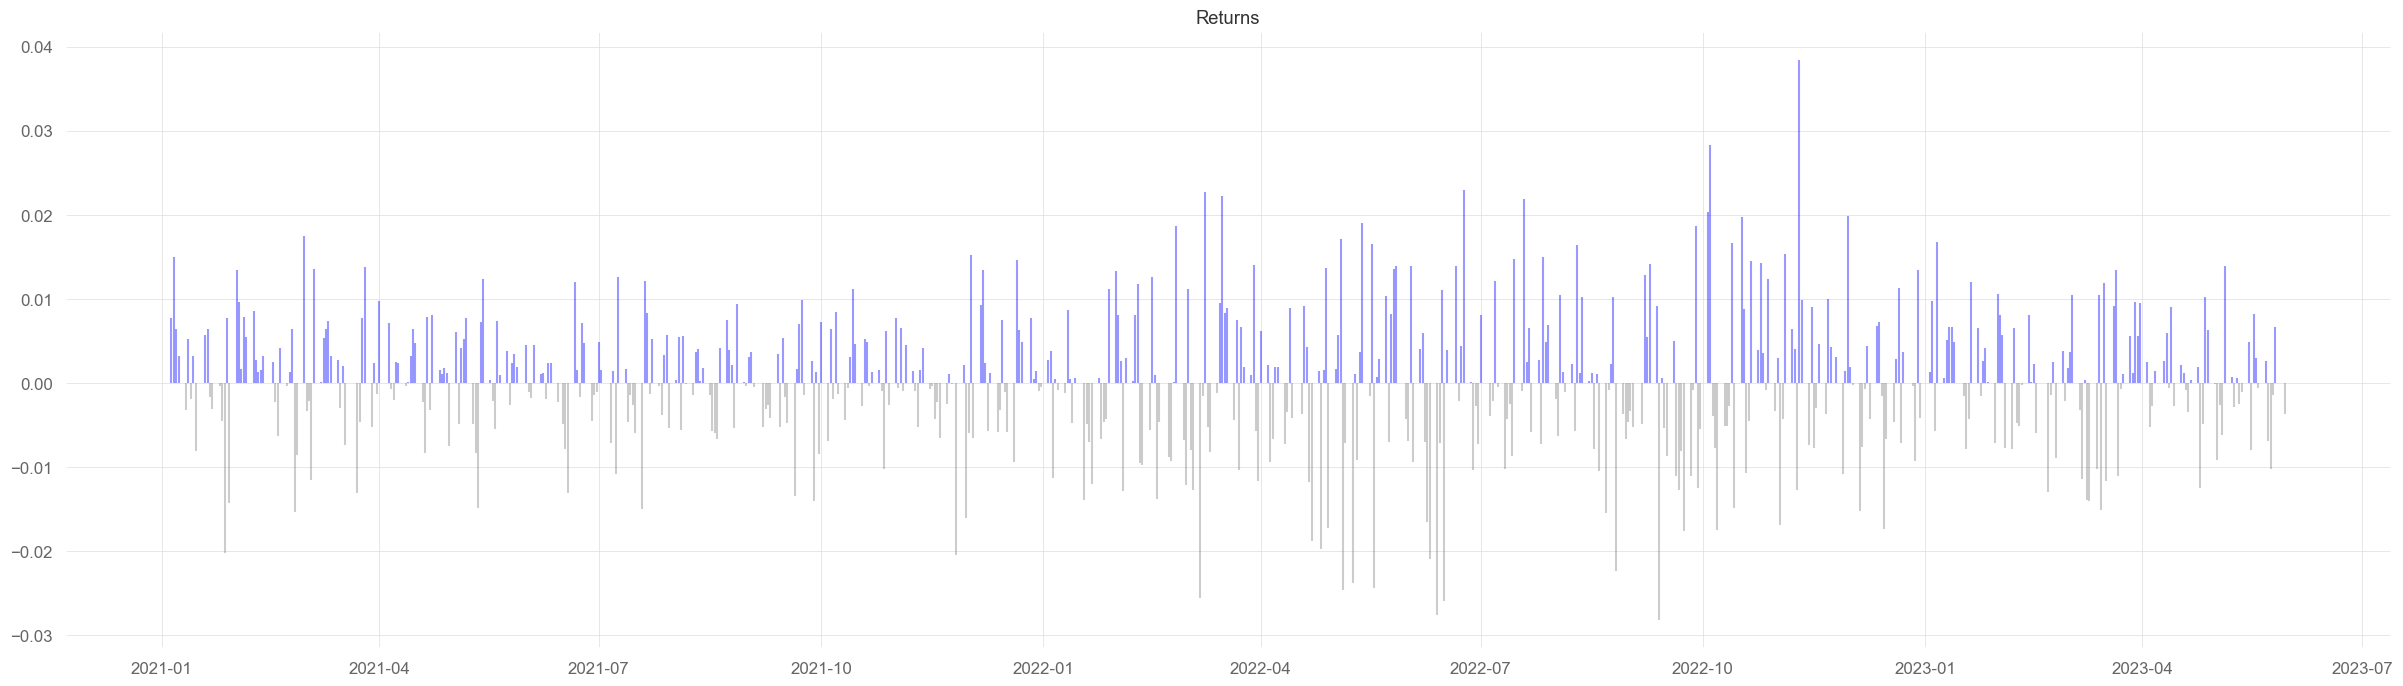

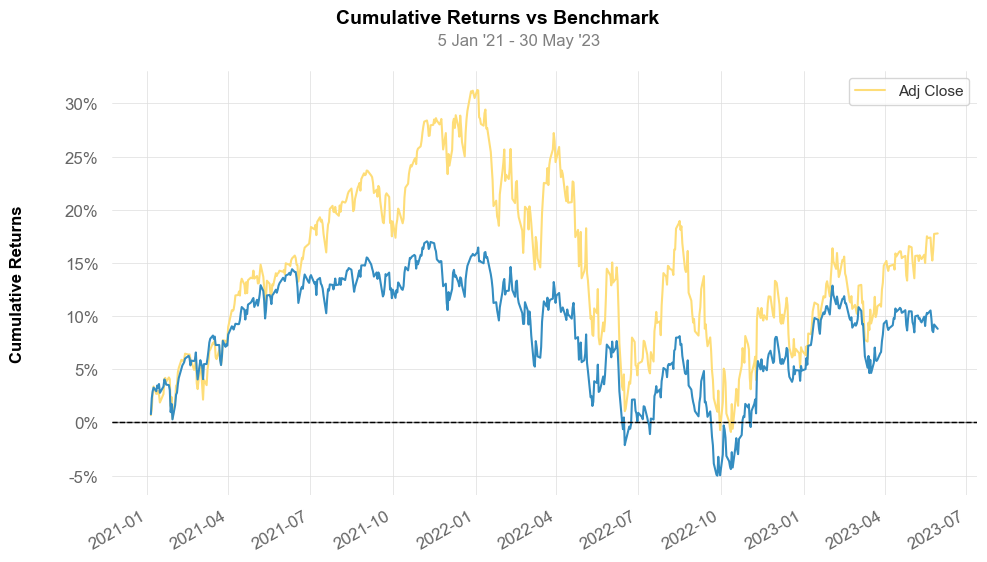

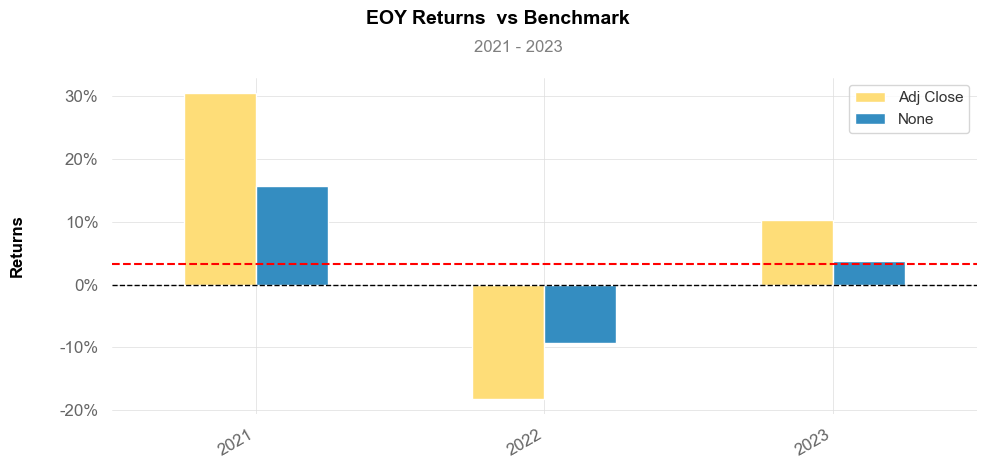

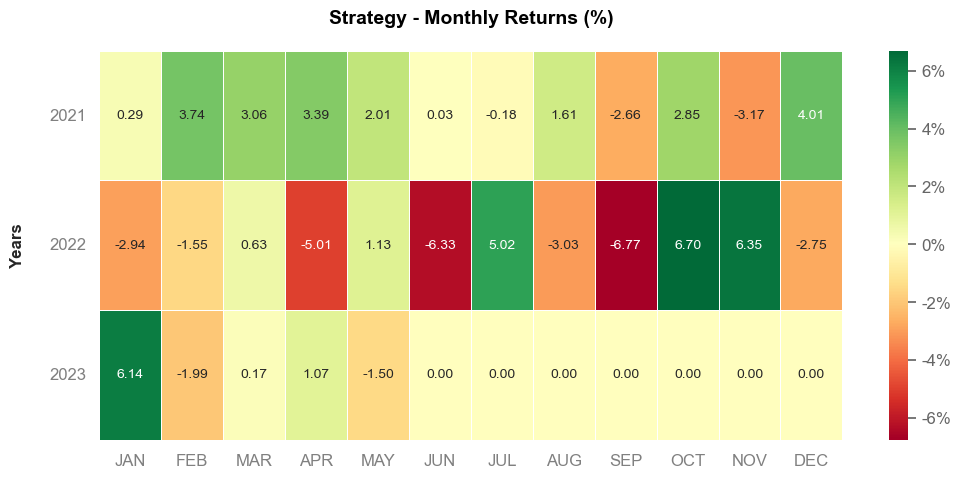

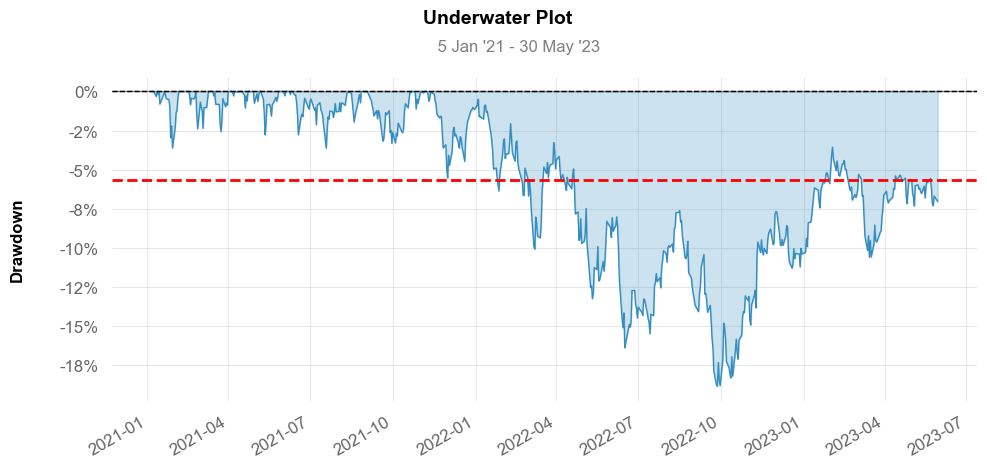

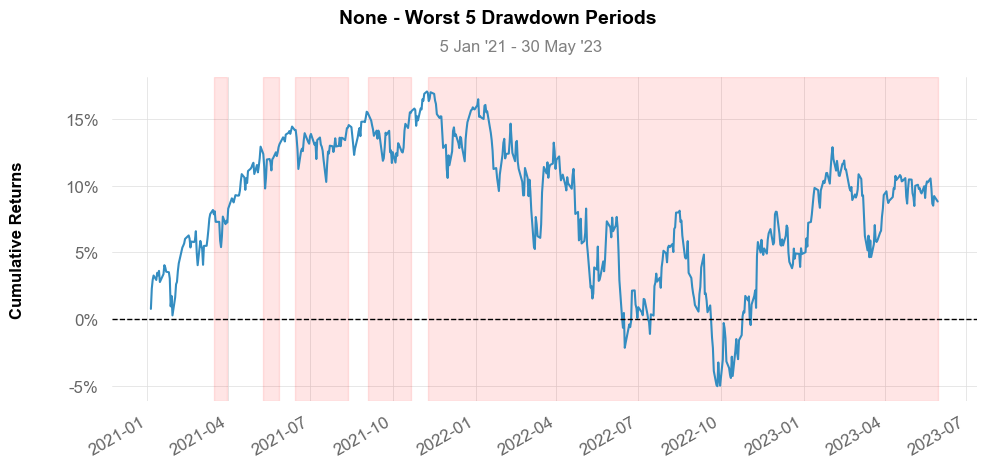

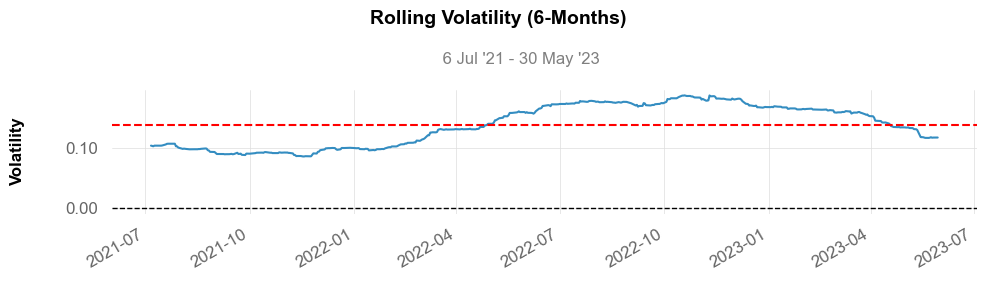

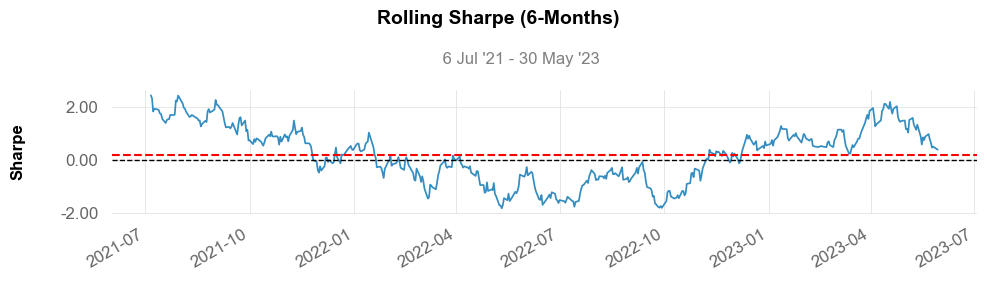

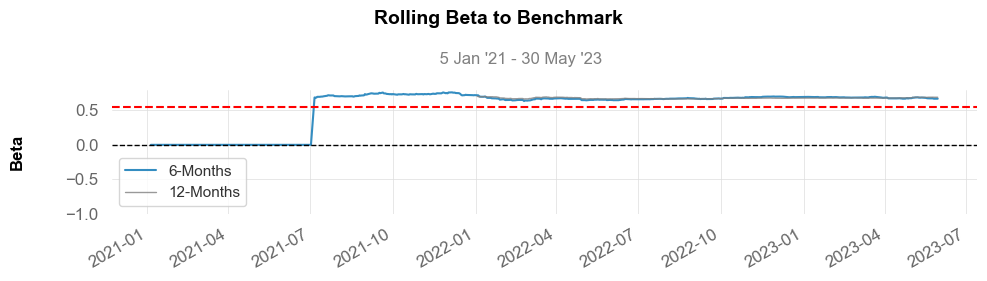

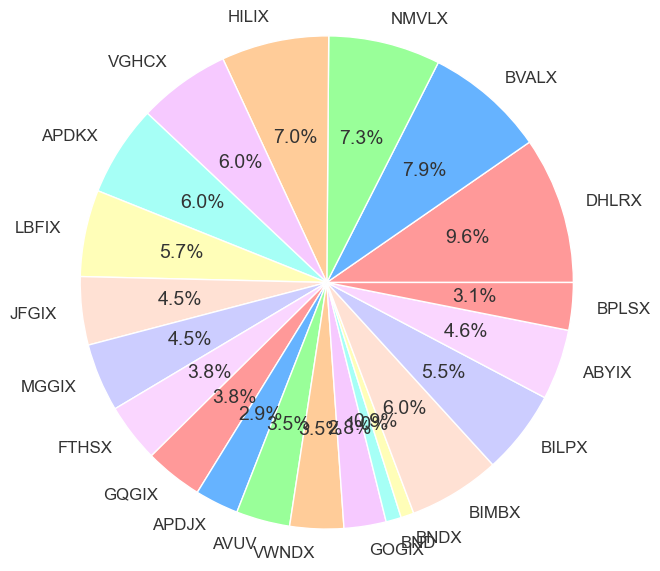

(None, None, None, None, None, None, None, None, None)

In [43]:
portfolio = Engine(    
         start_date= start, end_date= end, 
         portfolio= current_symbols, 
         weights = current_weights, #equal weighting is set by default
         benchmark = ["SPY"] #SPY is set by default
         
)
empyrial(portfolio)

# Now lets try it with small cap equitys
note we could do this for whole equity porfolio

Start date: 2021-01-01
End date: 2023-05-31


Backtest
                             
Annual return           2.41%
Cumulative return       5.87%
Annual volatility      9.53 %
Winning day ratio      52.15%
Sharpe ratio              0.3
Calmar ratio             0.12
Information ratio         0.0
Stability                 0.1
Max Drawdown         -14.26 %
Sortino ratio            0.43
Skew                     0.03
Kurtosis                 1.49
Tail Ratio               1.02
Common sense ratio       1.07
Daily value at risk    -1.0 %
Alpha                    0.03
Beta                     0.35

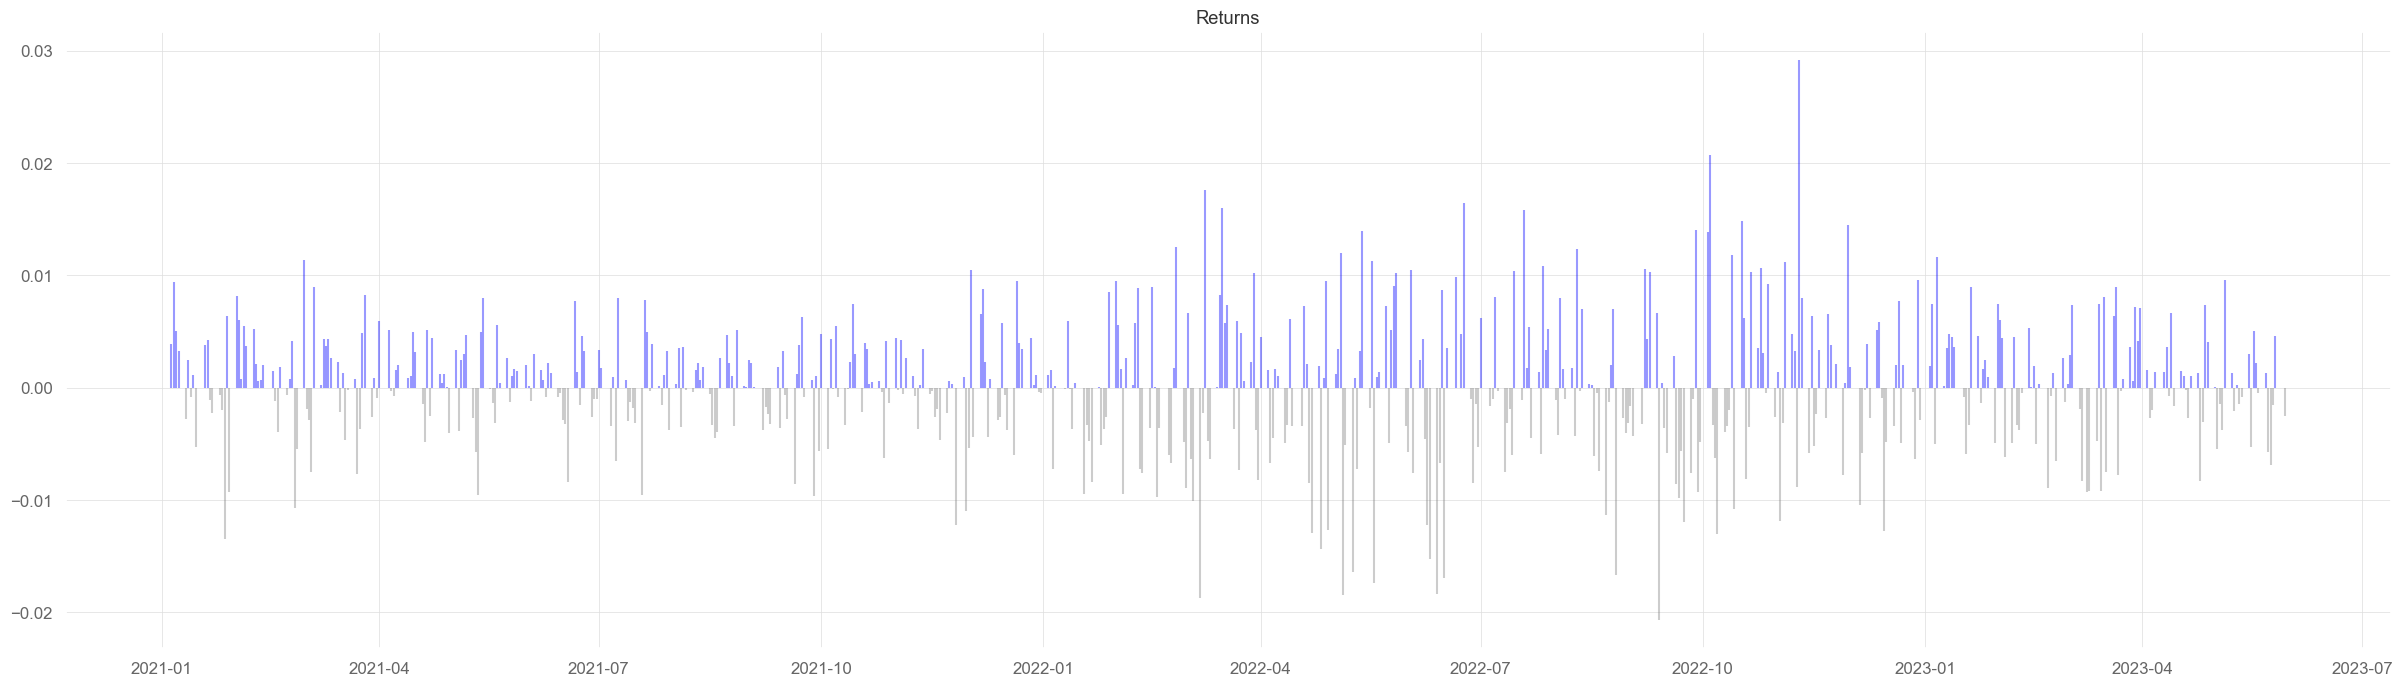

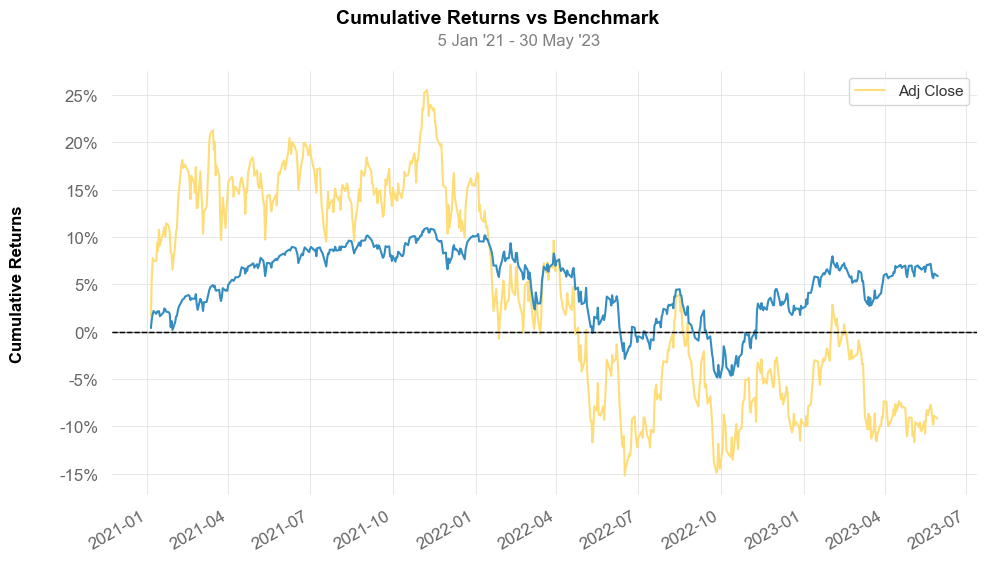

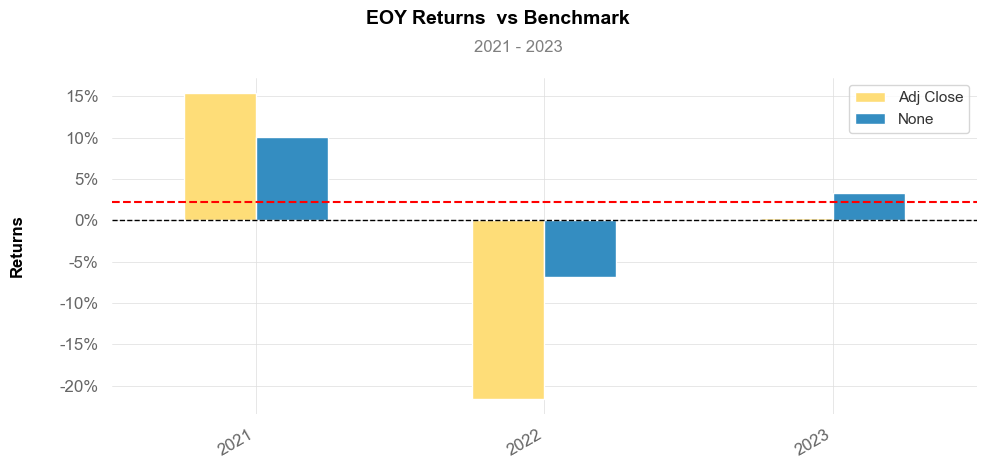

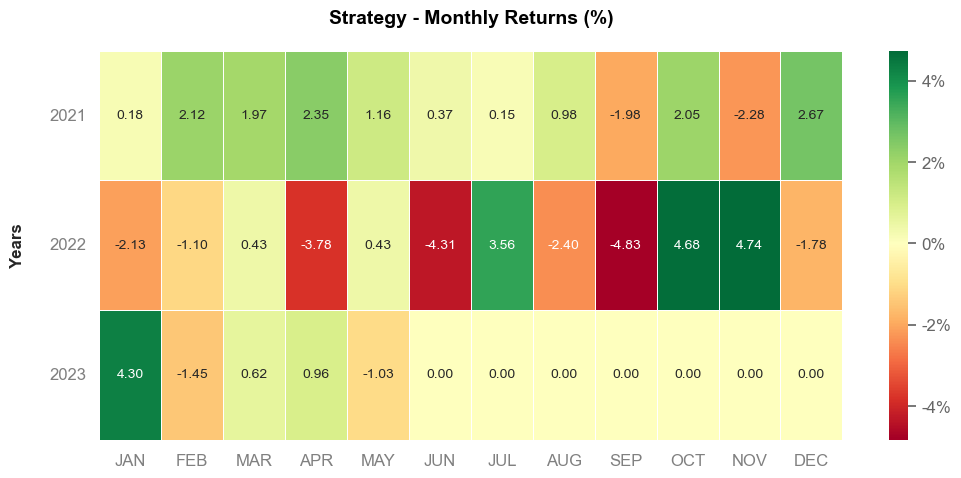

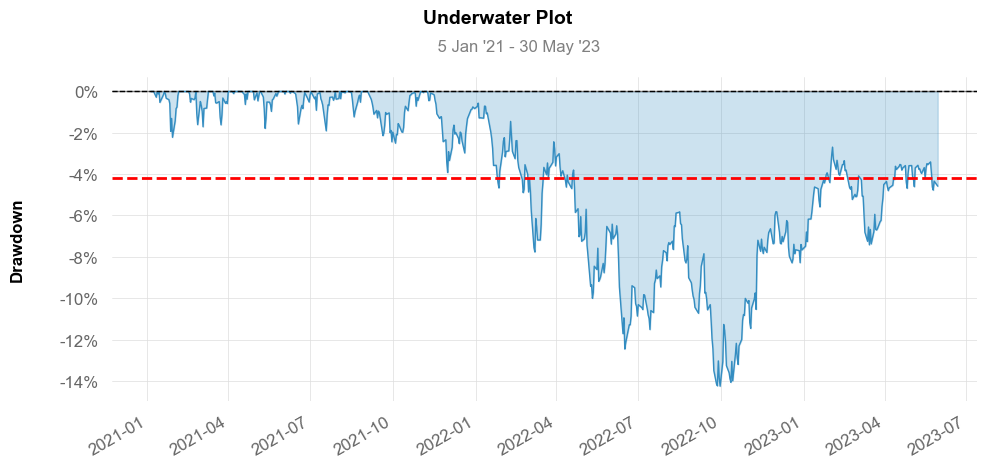

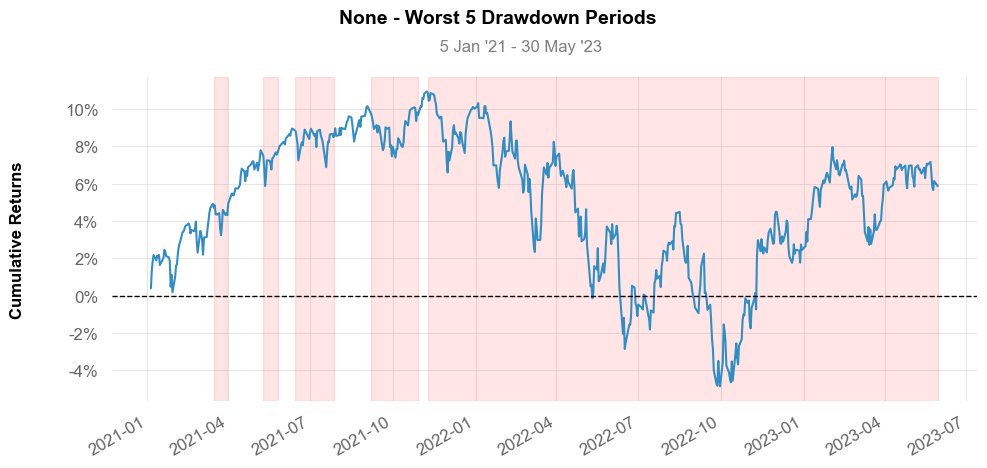

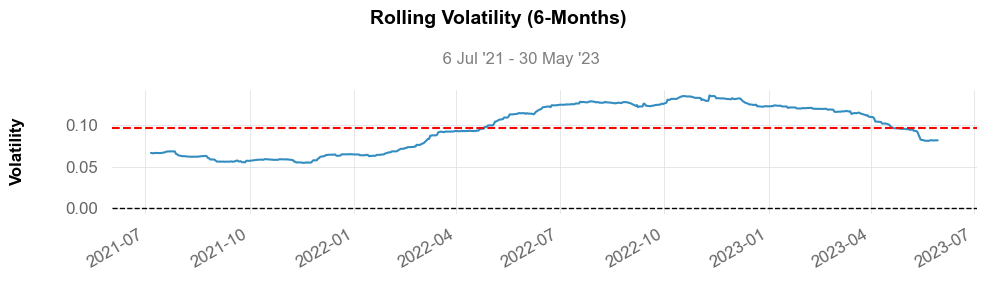

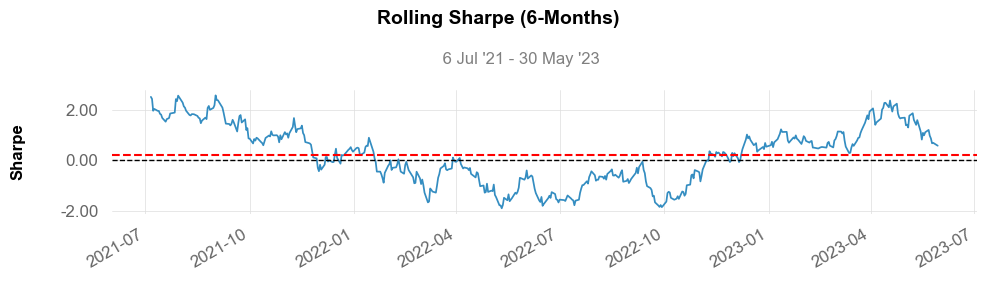

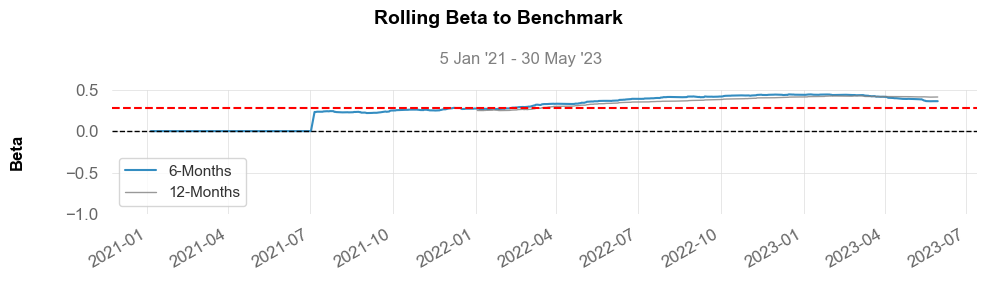

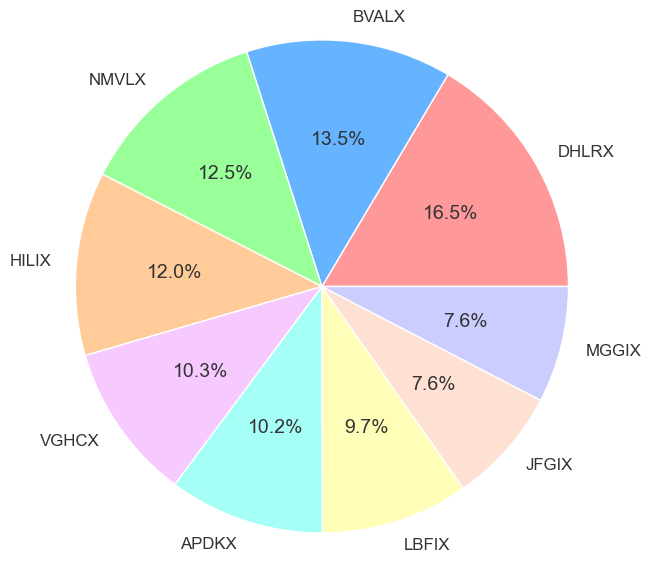

Yellow = Benchmark
Blue = Strategy


In [37]:
current_symbols_small_cap = []  # Create an empty list to store the unique ticker symbols for 'Small cap' within 'Equitys'

# Extracting ticker symbols for 'Small cap' within 'Equitys'
equitys_small_cap = current_portfolio['Equitys']['Small cap']
for ticker in equitys_small_cap.keys():
    current_symbols_small_cap.append(ticker)

current_weights_small_cap = [] 

# Extracting ticker symbols for 'Small cap' within 'Equitys'
equitys_small_cap = current_portfolio['Equitys']['Small cap']
for ticker in equitys_small_cap.values(): #Values() not keys()
    current_weights_small_cap.append(ticker)
    
    portfolio = Engine(    
         start_date= start, end_date= end, 
         portfolio= current_symbols_small_cap, 
         weights = current_weights_small_cap, #equal weighting is set by default
         benchmark = ["%5ERUT"] #Russle 2000
         
)
empyrial(portfolio)
print('Yellow = Benchmark')
print('Blue = Strategy')


# Lets go deeper and compare each item instead of weighted small cap portfolio returns
Download the Tearsheet: You can use the get_report() function of Empyrial to generate a tearsheet, and then download this as a PDF document. You can also generate a quantstats report and download a html or show the report in the console.

In [3]:
import quantstats as qs
import pandas as pd
import jpype
import asposecells
import io
import os

# extend pandas functionality with metrics, etc.
qs.extend_pandas()

# Define your the parameters that can be changed
start = '2022-01-01'
end = '2023-08-03'
stocks = ['VB', 'MSFT']  # Add the stock symbols you want to analyze
benchmark = '%5ERUT' #russle 2000

# Function to calculate metrics for a given stock and benchmark
def calculate_metrics(stock_symbol, benchmark_symbol, start_date, end_date):
    
    stock = qs.utils.download_returns(stock_symbol)
    stock_timeframe = stock[start_date:end_date]

    benchmark = qs.utils.download_returns(benchmark_symbol)
    benchmark_timeframe = benchmark[start_date:end_date]

    sharpe_ratio = qs.stats.sharpe(stock_timeframe)
    return stock_timeframe, benchmark_timeframe, sharpe_ratio
    
# Creates an empty list to store the reports for each stock
reports_list = []

# Calculates metrics for each stock and generate reports
for stock_symbol in stocks:
    stock_data, benchmark_data, sharpe_ratio = calculate_metrics(stock_symbol, benchmark, start, end)

    # Creates a QuantStats report for each stock and benchmark and store it as HTML
    stock_report = qs.reports.html(stock_data, benchmark_data)
    reports_list.append(stock_report)

# Create a DataFrame to store the reports
df = pd.DataFrame({'Stock': stocks, 'QuantStats Report': reports_list})



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [6]:
import quantstats as qs
import pandas as pd
import os
import webbrowser
import time
import pyperclip
from openpyxl import Workbook
from openpyxl.utils import get_column_letter
from openpyxl.styles import Font

# extend pandas functionality with metrics, etc.
qs.extend_pandas()

# Define your parameters that can be changed
start = '2022-01-01'
end = '2023-08-03'
stocks = ['VB', 'MSFT']  # Add the stock symbols you want to analyze
benchmark = '%5ERUT'  # russle 2000

# Function to calculate metrics for a given stock and benchmark
def calculate_metrics(stock_symbol, benchmark_symbol, start_date, end_date):
    stock = qs.utils.download_returns(stock_symbol)
    stock_timeframe = stock[start_date:end_date]

    benchmark = qs.utils.download_returns(benchmark_symbol)
    benchmark_timeframe = benchmark[start_date:end_date]

    sharpe_ratio = qs.stats.sharpe(stock_timeframe)
    return stock_timeframe, benchmark_timeframe, sharpe_ratio

# Creates an empty list to store the reports for each stock
urls_list = []  # To store the extracted URLs

# Calculates metrics for each stock and generate reports
for stock_symbol in stocks:
    stock_data, benchmark_data, sharpe_ratio = calculate_metrics(stock_symbol, benchmark, start, end)
    
    # Creates a QuantStats report for each stock and benchmark and store it as HTML
    stock_report = qs.reports.html(stock_data, benchmark_data)
    
    # Open the browser's download folder (modify the path according to your browser)
    browser_download_folder = "C:/Users/zachm/Downloads"

    # Wait for the user to download the report file
    input(f"Download the QuantStats report for {stock_symbol} and press Enter to continue...")
    
    # List all files in the download folder
    all_files = os.listdir(browser_download_folder)

    # Sort files by modification time (newest first)
    all_files.sort(key=lambda x: os.path.getmtime(os.path.join(browser_download_folder, x)), reverse=True)

    # Find the most recently modified HTML file
    for file_name in all_files:
        if file_name.endswith(".html"):
            latest_report_file = file_name
            break
    
    # Open the most recently modified HTML file in the browser
    report_file_path = os.path.join(browser_download_folder, latest_report_file)
    webbrowser.open(report_file_path, new=2)
    time.sleep(2)  # Give some time for the browser to load
    
    # Assuming the browser address bar contains the URL
    extracted_url = input("Copy the URL from the browser and paste it here: ")
    urls_list.append(extracted_url)

    # Clean up: Delete the downloaded HTML file
    os.remove(report_file_path)

# Create a Workbook and add a Worksheet
wb = Workbook()
ws = wb.active

# Write headers to the worksheet
ws.append(['Stock', 'Downloadable Link'])

# Write extracted URLs to the worksheet
for stock_symbol, url in zip(stocks, urls_list):
    downloadable_link = f'=HYPERLINK("{url}", "Download {stock_symbol} Report")'
    ws.append([stock_symbol, downloadable_link])

# Save the Excel file
excel_file_path = 'downloadable_links.xlsx'
wb.save(excel_file_path)

print(f"Downloadable links have been saved to '{excel_file_path}'.")

# Copy URLs to clipboard and continue
for url in urls_list:
    pyperclip.copy(url)
    input("URL copied to clipboard. Press Enter to continue to the next URL...")
    
print('Dont delete yet download links worked once')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Download the QuantStats report for VB and press Enter to continue...
Copy the URL from the browser and paste it here: file:///C:/Users/zachm/Downloads/quantstats-tearsheet%20(7).html
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Download the QuantStats report for MSFT and press Enter to continue...
Copy the URL from the browser and paste it here: file:///C:/Users/zachm/Downloads/quantstats-tearsheet%20(7).html
Downloadable links have been saved to 'downloadable_links.xlsx'.
URL copied to clipboard. Press Enter to continue to the next URL...
URL copied to clipboard. Press Enter to continue to the next URL...
Dont delete yet download links worked once


In [12]:
 import quantstats as qs
import pandas as pd
import os
import webbrowser
import time
import pyperclip
from openpyxl import Workbook
from openpyxl.styles import Font
from openpyxl.worksheet.hyperlink import Hyperlink

# extend pandas functionality with metrics, etc.
qs.extend_pandas()

# Define your parameters that can be changed
start = '2022-01-01'
end = '2023-08-03'
stocks = ['VB', 'MSFT']  # Add the stock symbols you want to analyze
benchmark = '%5ERUT'  # russle 2000

# Function to calculate metrics for a given stock and benchmark
def calculate_metrics(stock_symbol, benchmark_symbol, start_date, end_date):
    stock = qs.utils.download_returns(stock_symbol)
    stock_timeframe = stock[start_date:end_date]

    benchmark = qs.utils.download_returns(benchmark_symbol)
    benchmark_timeframe = benchmark[start_date:end_date]

    sharpe_ratio = qs.stats.sharpe(stock_timeframe)
    return stock_timeframe, benchmark_timeframe, sharpe_ratio

# Creates an empty list to store the reports for each stock
urls_list = []  # To store the extracted URLs

# Calculates metrics for each stock and generate reports
for stock_symbol in stocks:
    stock_data, benchmark_data, sharpe_ratio = calculate_metrics(stock_symbol, benchmark, start, end)
    
    # Creates a QuantStats report for each stock and benchmark and store it as HTML
    stock_report = qs.reports.html(stock_data, benchmark_data)
    
    # Open the browser's download folder (modify the path according to your browser)
    browser_download_folder = "C:/Users/zachm/Downloads"

    # Wait for the user to download the report file
    input(f"Download the QuantStats report for {stock_symbol} and press Enter to continue...")
    
    # List all files in the download folder
    all_files = os.listdir(browser_download_folder)

    # Sort files by modification time (newest first)
    all_files.sort(key=lambda x: os.path.getmtime(os.path.join(browser_download_folder, x)), reverse=True)

    # Find the most recently modified HTML file
    for file_name in all_files:
        if file_name.endswith(".html"):
            latest_report_file = file_name
            break
    
    # Open the most recently modified HTML file in the browser
    report_file_path = os.path.join(browser_download_folder, latest_report_file)
    webbrowser.open(report_file_path, new=2)
    time.sleep(2)  # Give some time for the browser to load
    
    # Assuming the browser address bar contains the URL
    extracted_url = input("Copy the URL from the browser and paste it here: ")
    urls_list.append(extracted_url)

    # Clean up: Delete the downloaded HTML file
    os.remove(report_file_path)
    
# Create a Workbook and add a Worksheet
wb = Workbook()
ws = wb.active

# Write headers to the worksheet
ws.append(['Stock', 'URL'])

# Write extracted URLs to the worksheet
for stock_symbol, url in zip(stocks, urls_list):
    ws.append([stock_symbol, url])

# Apply hyperlink to URLs
for row in ws.iter_rows(min_row=2, max_row=ws.max_row, min_col=2, max_col=2):
    cell = row[0]
    url = row[1].value
    hyperlink = Hyperlink(ref=cell.coordinate, target=url)
    cell.font = Font(underline="single", color="0563C1")
    cell.hyperlink = hyperlink

# Save the Excel file
excel_file_path = 'urls.xlsx'
wb.save(excel_file_path)

print(f"URLs have been saved to '{excel_file_path}'.")

# Copy URLs to clipboard and paste into Excel
for url in urls_list:
    pyperclip.copy(url)
    input("URL copied to clipboard. Press Enter to continue to the next URL...")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Download the QuantStats report for VB and press Enter to continue...
Copy the URL from the browser and paste it here: file:///C:/Users/zachm/Downloads/quantstats-tearsheet%20(7).html
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Download the QuantStats report for MSFT and press Enter to continue...
Copy the URL from the browser and paste it here: file:///C:/Users/zachm/Downloads/quantstats-tearsheet%20(7).html


IndexError: tuple index out of range

# Portfolio Optimization

In [15]:
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage

mu = mean_historical_return(df)
S = CovarianceShrinkage(df).ledoit_wolf()


In [16]:
from pypfopt.efficient_frontier import EfficientFrontier

ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()

In [17]:
cleaned_weights = ef.clean_weights()
ef.save_weights_to_file("weights.txt")  # saves to file
print(cleaned_weights)

OrderedDict([('ABYIX', 0.55418), ('APDJX', 0.0), ('APDKX', 0.0), ('AVUV', 0.0), ('BILPX', 0.0), ('BIMBX', 0.0), ('BND', 0.0), ('BNDX', 0.0), ('BPLSX', 0.44582), ('BVALX', 0.0), ('DHLRX', 0.0), ('FTHSX', 0.0), ('GOGIX', 0.0), ('GQGIX', 0.0), ('HILIX', 0.0), ('JFGIX', 0.0), ('LBFIX', 0.0), ('MGGIX', 0.0), ('NMVLX', 0.0), ('VGHCX', 0.0), ('VWNDX', 0.0)])


In [18]:
ef.portfolio_performance(verbose=True)

Expected annual return: 11.2%
Annual volatility: 8.6%
Sharpe Ratio: 1.08


(0.11216695848411815, 0.08558735927081595, 1.0768758292037377)

In [19]:
#Dealing with many negligible weights
from pypfopt import objective_functions

ef = EfficientFrontier(mu, S)
ef.add_objective(objective_functions.L2_reg, gamma=0.1)
w = ef.max_sharpe()
print(ef.clean_weights())

OrderedDict([('ABYIX', 0.20496), ('APDJX', 0.0), ('APDKX', 0.04612), ('AVUV', 0.11015), ('BILPX', 0.0), ('BIMBX', 0.0), ('BND', 0.0), ('BNDX', 0.0), ('BPLSX', 0.34724), ('BVALX', 0.02618), ('DHLRX', 0.0), ('FTHSX', 0.04257), ('GOGIX', 0.0), ('GQGIX', 0.0), ('HILIX', 0.10558), ('JFGIX', 0.0), ('LBFIX', 0.0), ('MGGIX', 0.0), ('NMVLX', 0.0), ('VGHCX', 0.00909), ('VWNDX', 0.1081)])


In [20]:
#convert these weights into an actual allocation
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
#change the value of portfolio####
da = DiscreteAllocation(w, latest_prices, total_portfolio_value=20000)
allocation, leftover = da.lp_portfolio()
print(allocation)
print('Number of shares you should purchase')

{'APDJX': 16, 'APDKX': 24, 'AVUV': 32, 'BILPX': 44, 'BIMBX': 43, 'BND': 2, 'BNDX': 3, 'BPLSX': 505, 'BVALX': 57, 'DHLRX': 6, 'FTHSX': 27, 'GOGIX': 9, 'GQGIX': 22, 'HILIX': 135, 'JFGIX': 34, 'LBFIX': 4, 'MGGIX': 8, 'NMVLX': 28, 'VGHCX': 1, 'VWNDX': 110}
Number of shares you should purchase


In [21]:
#choose index
#index='%5EGSPC'

    
#stock_rets = pf.utils.get_symbol_rets(index)
#pf.create_full_tear_sheet(stock_rets, live_start_date=start)
    

# Optimization without constraints

Start date: 2021-01-01
End date: 2023-05-31


Backtest
                             
Annual return          17.83%
Cumulative return      48.16%
Annual volatility      9.39 %
Winning day ratio      57.62%
Sharpe ratio             1.79
Calmar ratio             1.12
Information ratio         0.0
Stability                0.87
Max Drawdown         -10.67 %
Sortino ratio             2.6
Skew                     -0.5
Kurtosis                 1.15
Tail Ratio               1.05
Common sense ratio       1.41
Daily value at risk    -1.0 %
Alpha                    0.17
Beta                     0.13

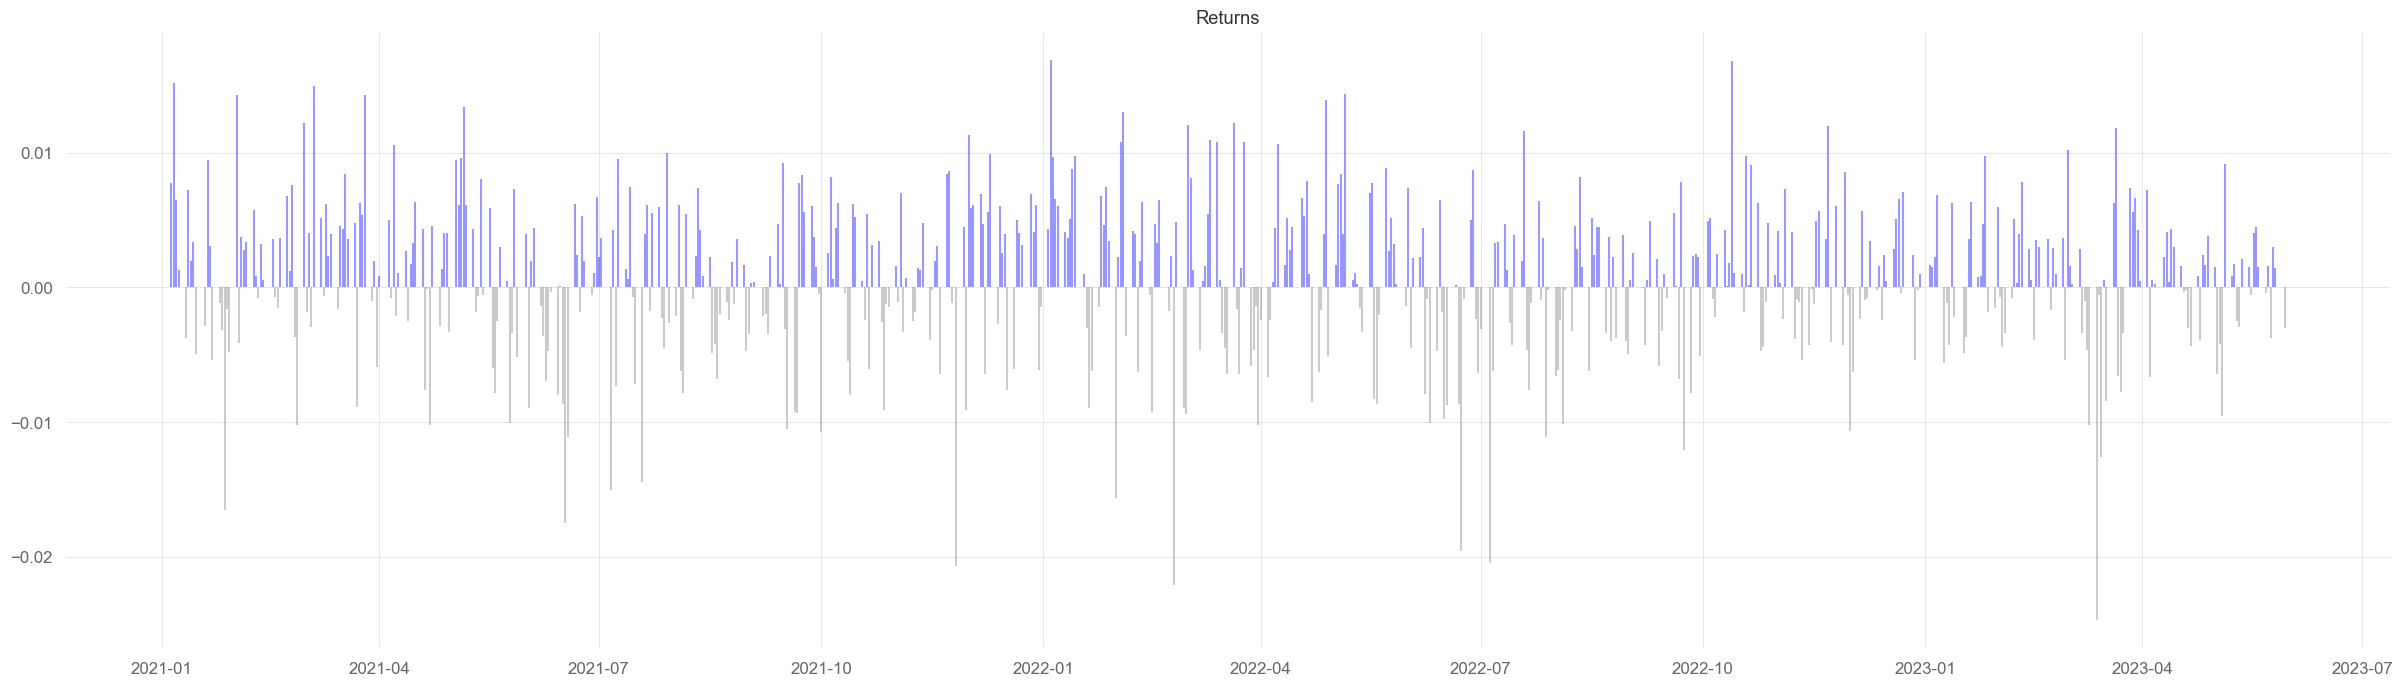

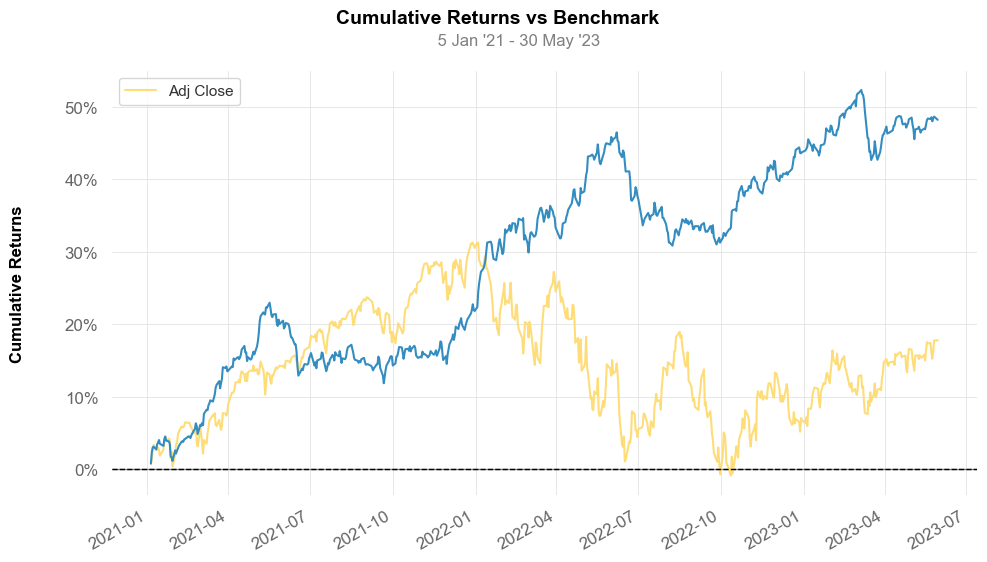

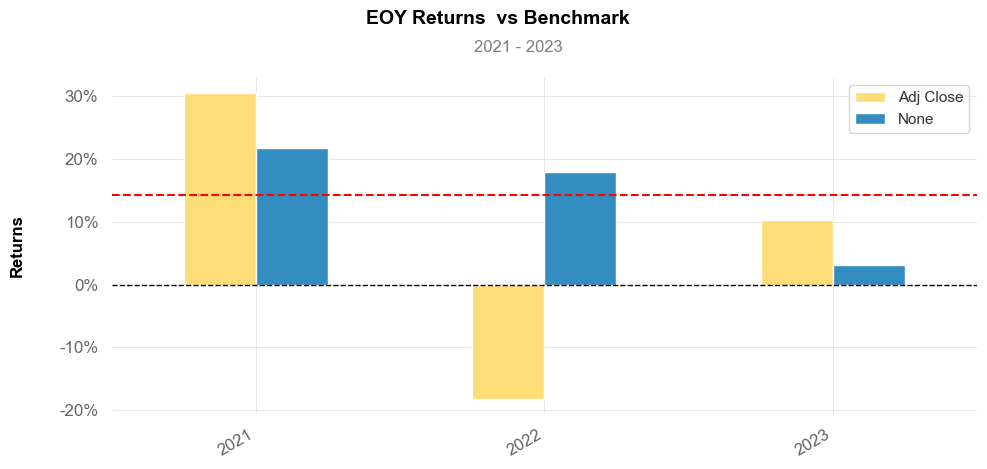

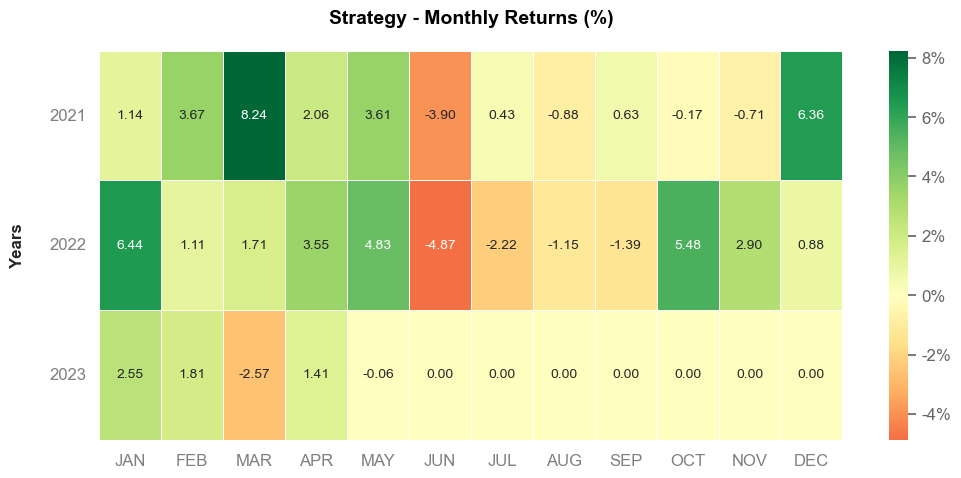

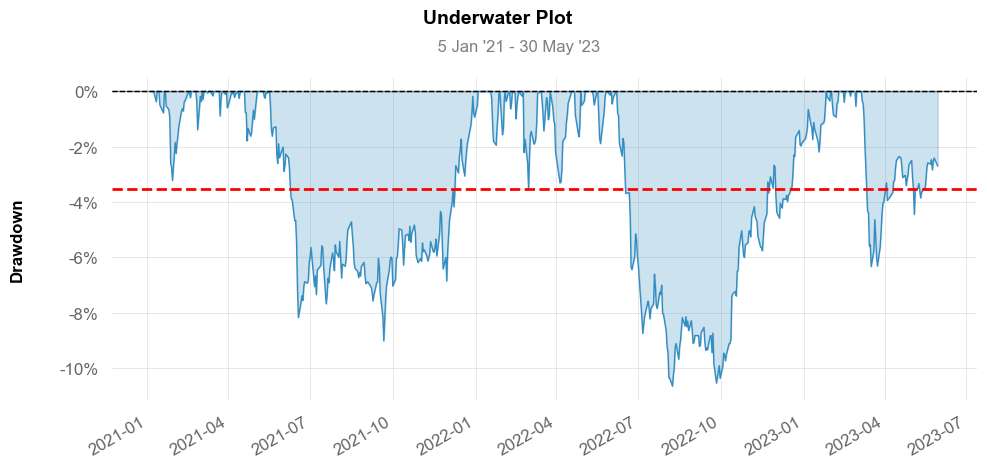

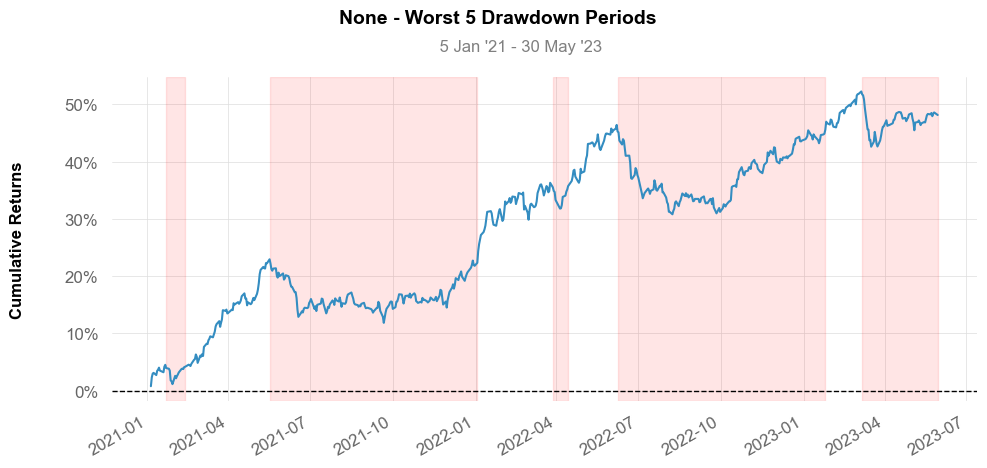

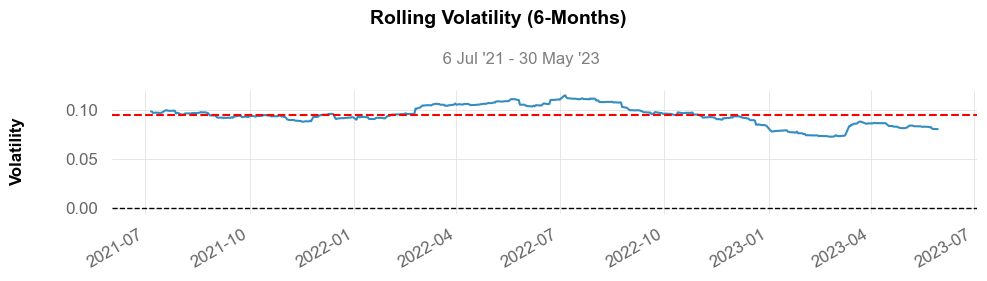

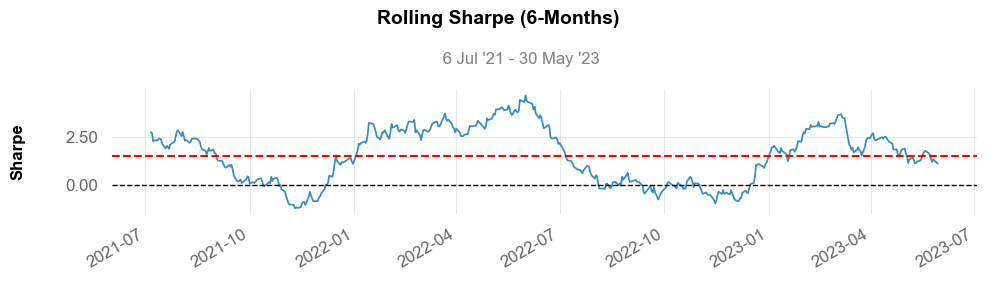

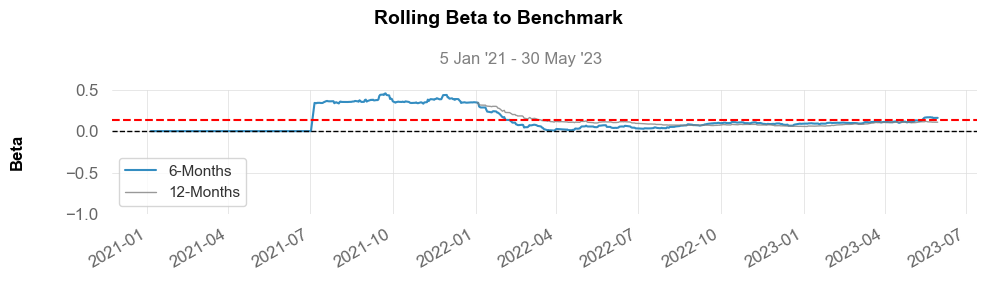

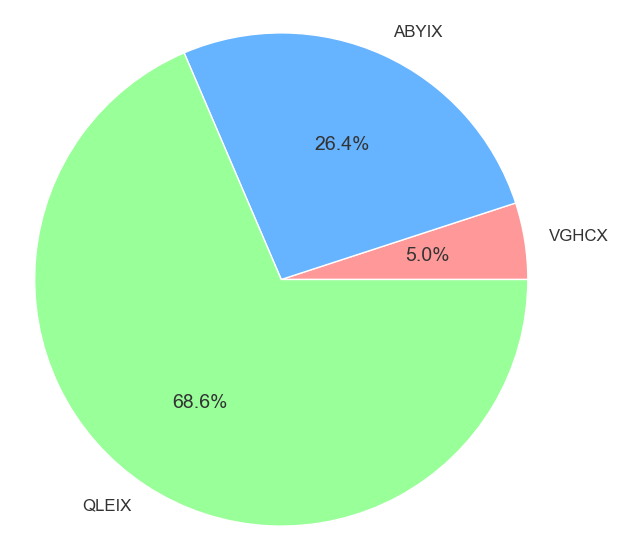

(None, None, None, None, None, None, None, None, None)

In [13]:
portfolio = Engine(    
         start_date= start, end_date= end, 
         portfolio= current_symbols, 
         #weights = current_weights, #equal weighting is set by default
         benchmark = ["SPY"], #SPY is set by default
         optimizer = "EF",
         rebalance = "1y"
)
empyrial(portfolio)

# Mean Variance Optimization



# Brinson Fachler
Implementing weight constraights and factor analysis for sector returns of portfolio

In [25]:
current_portfolio= {
    'Equity': {
        'DHLRX': 1,
        'BVALX': 2,
        'NMVLX': 3,
        'HILIX': 4,
        'VGHCX': 5,
        'APDKX': 6,
        'LBFIX': 7,
        'JFGIX': 8,
        'MGGIX': 9,
        'FTHSX': 10
    },   
    'Fixed income': {
        'VWEAX' : 11
        
    }
}
sector_names = {
    0 : "information_technology",
    1 : "financials",
    2 : "health_care",
    3 : "industrials",
    4 : "utilities", 
    5 : "real_estate", 
    6 : "materials", 
    7 : "telecommunication_services", 
    8 : "consumer_staples", 
    9 : "consumer_discretionary", 
    10 : "energy",
    11 : "short&highFI"
}

current_symbols = [fund for asset_class in current_portfolio.values() for fund in asset_class.keys()]
current_data = yf.download(current_symbols, start= start, end = end)
current_data = current_data['Open'].dropna()
current_data

[*********************100%***********************]  11 of 11 completed


APDKX  BVALX      DHLRX      FTHSX      HILIX  JFGIX  \
Date                                                                   
2021-01-04  39.820000  12.26  30.150000  29.620001  13.820000  12.41   
2021-01-05  40.220001  12.34  30.299999  30.059999  14.060000  12.43   
2021-01-06  40.889999  12.70  30.990000  31.450001  14.400000  12.50   
2021-01-07  41.029999  12.77  31.230000  31.750000  14.560000  12.55   
2021-01-08  41.700001  12.76  31.260000  31.490000  14.610000  12.62   
...               ...    ...        ...        ...        ...    ...   
2023-05-23  42.730000  12.93  28.910000  34.689999  16.480000  11.04   
2023-05-24  42.230000  12.78  28.559999  34.310001  16.299999  10.80   
2023-05-25  42.070000  12.80  28.469999  34.430000  16.190001  10.81   
2023-05-26  42.500000  12.93  28.690001  34.709999  16.219999  10.94   
2023-05-30  42.270000  12.87  28.660000  34.639999  16.100000  10.88   

                LBFIX      MGGIX  NMVLX       VGHCX  VWEAX  
Date                                                        
2021-01-04  47.130001  44.750000  13.90  214.979996   5.98  
2021-01-05  47.759998  44.650002  13.93  215.600006   5.98  
2021-01-06  48.029999  43.919998  14.30  217.259995   5.98  
2021-01-07  49.279999  44.560001  14.27  219.960007   5.99  
2021-01-08  49.880001  45.110001  14.29  221.660004   5.99  
...               ...        ...    ...         ...    ...  
2023-05-23  40.520000  25.410000  12.34  212.699997   5.19  
2023-05-24  40.250000  25.270000  12.15  210.490005   5.17  
2023-05-25  40.349998  25.340000  12.10  208.009995   5.16  
2023-05-26  40.830002  25.809999  12.14  208.210007   5.16  
2023-05-30  40.930000  25.629999  12.10  206.119995   5.18  

[605 rows x 11 columns]

In [26]:
pan = current_data.copy()

In [37]:
lookahead_bias_days = 5

predictive_factor = pan.pct_change(lookahead_bias_days)
# introduce look-ahead bias and make the factor predictive
predictive_factor = predictive_factor.shift(-lookahead_bias_days)

predictive_factor = predictive_factor.stack()
predictive_factor.index = predictive_factor.MultiIndex.set_names(["date", 'asset'])

AttributeError: 'Series' object has no attribute 'MultiIndex'

In [28]:
predictive_factor.head()

date        asset
2021-01-04  APDKX    0.036163
            BVALX    0.038336
            DHLRX    0.035489
            FTHSX    0.063471
            HILIX    0.042692
dtype: float64

In [29]:
pricing = pan.iloc[1:]
pricing.head()

APDKX  BVALX      DHLRX      FTHSX  HILIX  JFGIX      LBFIX  \
Date                                                                          
2021-01-05  40.220001  12.34  30.299999  30.059999  14.06  12.43  47.759998   
2021-01-06  40.889999  12.70  30.990000  31.450001  14.40  12.50  48.029999   
2021-01-07  41.029999  12.77  31.230000  31.750000  14.56  12.55  49.279999   
2021-01-08  41.700001  12.76  31.260000  31.490000  14.61  12.62  49.880001   
2021-01-11  41.259998  12.73  31.219999  31.500000  14.41  12.47  49.900002   

                MGGIX  NMVLX       VGHCX  VWEAX  
Date                                             
2021-01-05  44.650002  13.93  215.600006   5.98  
2021-01-06  43.919998  14.30  217.259995   5.98  
2021-01-07  44.560001  14.27  219.960007   5.99  
2021-01-08  45.110001  14.29  221.660004   5.99  
2021-01-11  44.490002  14.24  223.360001   5.98

In [30]:
 # Create a pandas Series of sector labels corresponding to the assets in predictive_factor
sector_labels = pd.Series(
    [sector_names[fund_class_idx] for asset_class in current_portfolio.values() for fund, fund_class_idx in asset_class.items()],
    index=current_symbols
)

In [31]:
 

print(alphalens.__version__)

print(pd.__version__)  # This will print the current pandas version
factor = predictive_factor
factor.head()
#predictive_factor.index = pd.MultiIndex.from_tuples(predictive_factor.index, names=['date', 'asset'])
# Convert the index to a MultiIndex and set names for the levels
#predictive_factor.index = pd.MultiIndex.from_tuples(predictive_factor.index).rename=(['date', 'asset'])
import sys, subprocess
subprocess.run([sys.executable, '-m', 'pip', 'install', 'pandas==1.0.0'])

print(pd.__version__)

0.3.6
2.0.3
2.0.3


In [36]:
# Set names for the MultiIndex levels directly when creating the DataFrame
factor_data = alphalens.utils.get_clean_factor_and_forward_returns(
    predictive_factor,
    pricing, 
    quantiles=5,
    bins=None,
    groupby=current_portfolio,
    groupby_labels=sector_labels
)




                                           

RuntimeError: Cannot set name on a level of a MultiIndex. Use 'MultiIndex.set_names' instead.

In [33]:
# Load data from the Excel file
data = pd.read_excel('Data.xlsx', sheet_name='Prices')
prices = data.values

qp = pd.read_excel('Data.xlsx', sheet_name='Portweights')
port_weight = qp.values.T

q = pd.read_excel('Data.xlsx', sheet_name='Benchweight')
bench_weight = q.values.T

G = 0.15  # Constraint outperformance from IPS to CE portfolio

# Turn the prices into returns
nobs, nsec = prices.shape
returns = np.zeros((nobs - 1, nsec))  # pre-assign size for faster code

for idx in range(nsec):
    returns[:, idx] = np.log(prices[1:, idx] / prices[:-1, idx])

exp_ret = np.mean(returns, axis=0)

sec1 = 14  # Number of stocks in the first sector
sec2 = 9
sec3 = 44
sec4 = 34
sec5 = 4
sec6 = 15
sec7 = 6
sec8 = 55
sec9 = 4
sec10 = 10
secs = [sec1, sec2, sec3, sec4, sec5, sec6, sec7, sec8, sec9, sec10]

if sum(secs) != nsec:
    raise ValueError('the sum number of holdings in the sectors must match the total number of securities')

# Now you have the returns and other variables as required in the Python code.
# You can continue with the rest of the calculations and analysis using the data you have.
# For example, you can proceed with calculating asset allocation, selection effect, interaction term, VaR, CVaR, etc.
# The specific calculations would depend on the rest of the MATLAB code that follows the provided code snippet.

FileNotFoundError: [Errno 2] No such file or directory: 'Data.xlsx'